In [1]:
import pysftp
import os 
import numpy as np
import pandas as pd
import netCDF4
import numpy as np

from scipy import io
from classes.matlab_reader import matlab_reader
from classes.grid_funcs import map_grid,dataset,data_wizard
from dotenv import load_dotenv   #for python-dotenv method
from datetime import datetime

load_dotenv() 

Hostname = "eepc-0184.bath.ac.uk"
Username = "jmdomd20"
Password = os.environ.get('PASSWORD')


date_string = '1/1/2021'  # specify the date string in d/m/y format
date_object = datetime.strptime(date_string, '%d/%m/%Y')  # convert the string to a datetime object
day_of_year = date_object.timetuple().tm_yday  # get the day of the year

print(day_of_year)  # output: 83

grid = map_grid(grid_size=None, source='era5')
wizard = data_wizard()

/Users/joaojesus/opt/anaconda3/envs/geo_plotting/lib/python3.8/site-packages/paramiko/transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


1


In [3]:
download_flag = True
if download_flag:
    for year in range(2017,2022):

        with pysftp.Connection(host=Hostname, username=Username, password=Password) as sftp:
            print("Connection successfully established ... ")
            # Switch to a remote directory
            sftp.cwd(f'/data1/ERA5/{year}')

            # Obtain structure of the remote directory '/opt'
            directory_structure = sftp.listdir_attr()

            # # Print data
            # for attr in directory_structure:
            #     print(attr.filename, attr)
            
            for i in range(len(directory_structure)):
                try:
                    file_name = directory_structure[i].filename
                    print('downloading....' ,file_name)
                    sftp.get(file_name) 
                    print('download complete')


                    ds = netCDF4.Dataset(file_name)

                    hour = 3
                    level = 100

                    wind_northward = ds['v'][hour][level]# nortward
                    wind_eastward = ds['u'][hour][level] # eastward
                    temperature = ds['t'][hour][level]

                    lat = np.genfromtxt(f'COORDINATES_ERA/COORDINATES_ERA5_LAT.csv', delimiter=',')
                    lon = np.genfromtxt(f'COORDINATES_ERA/COORDINATES_ERA5_LON.csv', delimiter=',')
                    grid_ = np.meshgrid(lon,lat)

                    grid = map_grid(grid_size=None, source='era5')
                    wizard = data_wizard()

                    print('mean, ',i, np.nanmean(wind_eastward),np.nanmax(wind_eastward), np.nanmin(wind_eastward))

                    np.savetxt(f'GENERATED_CSV/WIND_NORTHWARD/level_100/{file_name}_{hour}_{level}_wind_northward.csv',wind_northward, delimiter = ',')
                    np.savetxt(f'GENERATED_CSV/WIND_EASTWARD/level_100/{file_name}_{hour}_{level}_wind_eastward.csv',wind_eastward, delimiter = ',')
                    np.savetxt(f'GENERATED_CSV/TEMPERATURE/level_100/{file_name}_{hour}_{level}_temperature.csv',temperature, delimiter = ',')

                    print('delete file')
                    os.remove(file_name)
                except:
                    pass


Connection successfully established ... 
downloading.... era5_2017d001.nc
download complete
mean,  0 4.437804558891318 54.208359948879306 -34.417204467518246
delete file
downloading.... era5_2017d002.nc
download complete
mean,  1 4.6608622897703365 48.260711899852666 -35.06856509715939
delete file
downloading.... era5_2017d003.nc
download complete
mean,  2 4.845115194502459 41.10621356147712 -28.62818316727321
delete file
downloading.... era5_2017d004.nc
download complete
mean,  3 4.989689719158631 42.67998732252687 -25.390866040226634
delete file
downloading.... era5_2017d005.nc
download complete
mean,  4 4.967312732096236 54.46759449034407 -26.38575694358469
delete file
downloading.... era5_2017d006.nc
download complete
mean,  5 4.9630849280321 44.28151876894806 -22.37015668541789
delete file
downloading.... era5_2017d007.nc
download complete
mean,  6 5.231177389844274 43.66295459346769 -27.904275471412546
delete file
downloading.... era5_2017d008.nc
download complete
mean,  7 5.2809

Socket exception: Connection reset by peer (54)


downloading.... era5_2018d056.nc
downloading.... era5_2018d057.nc
downloading.... era5_2018d058.nc
downloading.... era5_2018d059.nc
downloading.... era5_2018d060.nc
downloading.... era5_2018d061.nc
downloading.... era5_2018d062.nc
downloading.... era5_2018d063.nc
downloading.... era5_2018d064.nc
downloading.... era5_2018d065.nc
downloading.... era5_2018d066.nc
downloading.... era5_2018d067.nc
downloading.... era5_2018d068.nc
downloading.... era5_2018d069.nc
downloading.... era5_2018d070.nc
downloading.... era5_2018d071.nc
downloading.... era5_2018d072.nc
downloading.... era5_2018d073.nc
downloading.... era5_2018d074.nc
downloading.... era5_2018d075.nc
downloading.... era5_2018d076.nc
downloading.... era5_2018d077.nc
downloading.... era5_2018d078.nc
downloading.... era5_2018d079.nc
downloading.... era5_2018d080.nc
downloading.... era5_2018d081.nc
downloading.... era5_2018d082.nc
downloading.... era5_2018d083.nc
downloading.... era5_2018d084.nc
downloading.... era5_2018d085.nc
downloadin

In [197]:

ds = netCDF4.Dataset(filename)

wind_northward = ds['v'][3][25]# nortward
wind_eastward = ds['u'][3][25] # eastward
temperature = ds['t'][3][25]

lat = np.genfromtxt(f'COORDINATES_ERA/COORDINATES_ERA5_LAT.csv', delimiter=',')
lon = np.genfromtxt(f'COORDINATES_ERA/COORDINATES_ERA5_LON.csv', delimiter=',')
grid_ = np.meshgrid(lon,lat)



print('mean, ',i, np.nanmean(wind_eastward),np.nanmax(wind_eastward), np.nanmin(wind_eastward))

year = 2022
day = i
hour = 3
level = 25

np.savetxt(f'GENERATED_CSV/{year}_{day}_{hour}_{level}_wind_eastward.csv',wind_eastward, delimiter = ',')

mean,  36 0.38003712056873723 124.87854816062533 -47.8276284925832


In [12]:
# filter data 
 
wind_eastward = np.loadtxt('GENERATED_CSV/WIND_EASTWARD/era5_1991d001.nc_3_25_wind_eastward.csv', delimiter=",")

select_area_indexer = grid.select_area_indexer(
    min_lat= 55,
    max_lat= 65,
    min_lon= -180,
    max_lon= 180)

data = wizard.data_filtering(select_area_indexer = select_area_indexer ,data = wind_eastward)

35.67108847772405

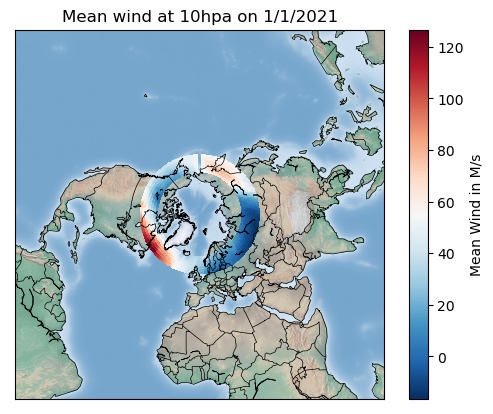

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

fig = plt.figure()
# fig, axes = plt.subplots(1, 2)

# axes[0].set_title("2018")
m = Basemap(projection='npstere',boundinglat=0,lon_0=0,resolution='c')
m.shadedrelief(scale=0.5)

# use to plot areas in any section of the globe using a stereographic projection
# m = Basemap(projection='stere',llcrnrlat=-80,urcrnrlat=80,\
#             llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

m.pcolormesh(grid.grid_[0], grid.grid_[1], data,latlon=True, cmap='RdBu_r',shading='auto')
m.drawcoastlines(linewidth=0.5,linestyle='solid')
m.drawcountries(linewidth=0.5, linestyle='solid',color='k')


plt.title(f'Mean wind at 10hpa on {date_string}')
plt.colorbar(label='Mean Wind in M/s')
